1. Exploration du dataset

In [10]:
import pandas as pd

In [11]:
pwd

'C:\\Users\\khalid'

- On charge le csv dans une dataframe pandas df

In [12]:
df = pd.read_csv('advertising.csv', sep =',', error_bad_lines = False)
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [78]:
df.shape

(197, 5)

In [13]:
from sklearn.datasets import make_regression
from time import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


- La distribution de chaque variable 
Le moyen le plus pratique pour examiner rapidement une distribution est la fonction hist.
Une fonction hist existe  dans matplotlib. les histogrammes ci dessous représentent la distribution des 4 variables en formant des cellules le long de la plage des données, puis en dessinant des barres pour afficher le nombre d'observations dans chaque case.


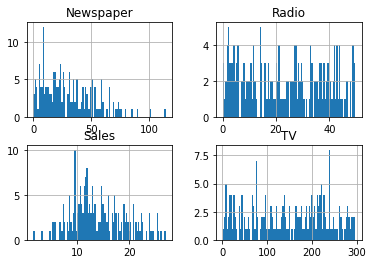

In [18]:
df.hist(bins = 100)
plt.show()


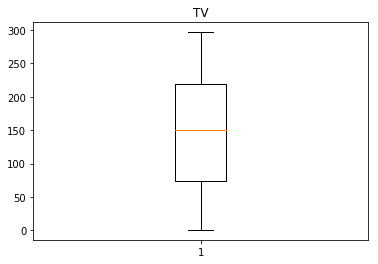

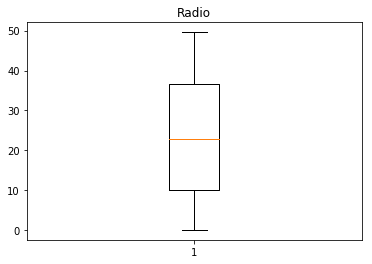

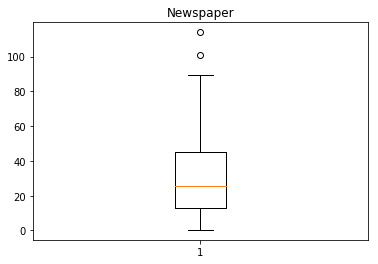

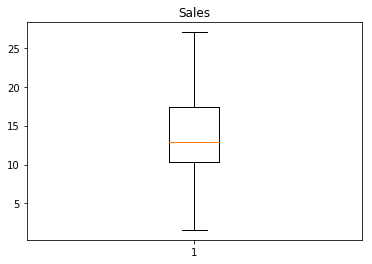

In [19]:
#l'esxistence de valeur aberrantes (outliers)
for i in range(len(df.iloc[1,:])):
    if df.iloc[:,i].dtype ==  'float64':
        figure = plt.figure()
        plt.boxplot(df.iloc[:,i])
        plt.title('%s' %df.columns[i])

On remarque la presence de 2 valeurs aberrantes pour la variable Newspaper qui prennesnt des valeurs au dela de 85 , et qu'on va eliminer dans ce qui suit :

{'whiskers': [<matplotlib.lines.Line2D at 0x2d807e8b160>,
 'caps': [<matplotlib.lines.Line2D at 0x2d807e2ee10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d807e8b6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d807e2edd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d807e2e160>],
 'means': []}

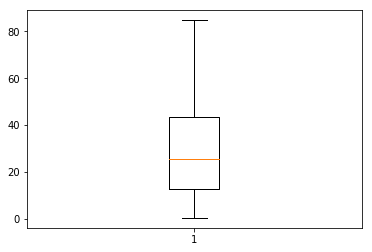

In [22]:
condition = (df['Newspaper'] < 85  )
df = df[condition]
plt.boxplot(df['Newspaper'])

In [24]:
# existence de valeur manquante
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [26]:
# La correlation entre les variables
corr = df.corr()
corr


,TV,Radio,Newspaper,Sales
TV,1.000000,0.063387,0.074433,0.777877
Radio,0.063387,1.000000,0.334719,0.588350
Newspaper,0.074433,0.334719,1.000000,0.240572
Sales,0.777877,0.588350,0.240572,1.000000


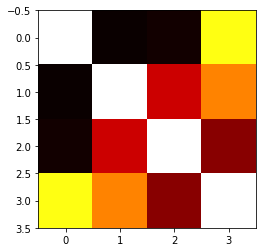

In [27]:
# heatmap de correlation
plt.imshow(corr,cmap='hot',interpolation='nearest')


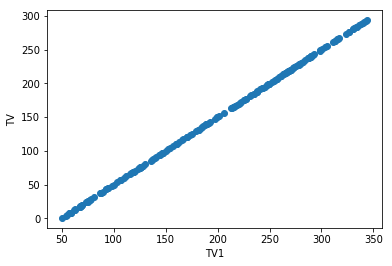

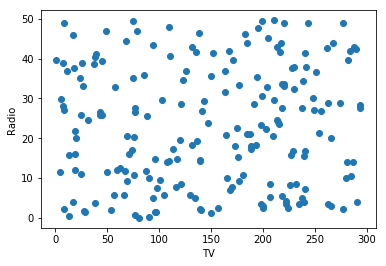

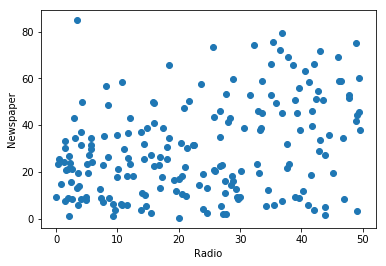

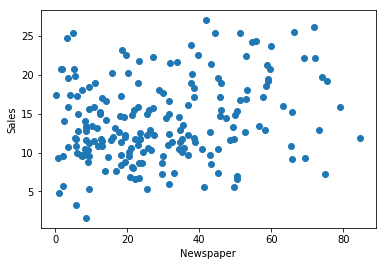

In [75]:
# scatterplot de chaque couple de variable
for i in range (-1,3):
    figure = plt.figure()
    plt.scatter(df.iloc[:,i], df.iloc[:,i+1])
    plt.xlabel('{}'.format(df.columns[i]))
    plt.ylabel('{}'.format(df.columns[i+1]))


2. Modeles univariables
Pour chacun des predicteurs (TV, Radio, Newspaper) on crée un modèle univariable.

Methode 1 : Les lignes de code suivantes permettent de creer automatiquement 3 modele sans avoir a le faire d'une maniere separer, et aussi de trier pour trouver le  meilleur R^2 et P-value.

In [59]:
import statsmodels.formula.api as smf

a = 0
b = 0
L = df.columns
cond = L != 'Sales'
L[cond]
for i in L[cond]:
    lm = smf.ols(formula='Sales ~ %s ' %i, data=df).fit()
    print(lm.summary())
    
    lm = smf.ols(formula='Sales ~ %s ' %i, data=df).fit()
    if lm.rsquared > a: 
        a = lm.rsquared
        
    if lm.pvalues[1] > b: 
        b = lm.pvalues[1]   
  
        
        
print('Le meilleur R^2 est %s' %a)
print('Le meilleur P-value est %s' %b)    

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     298.8
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           3.33e-41
Time:                        16:10:00   Log-Likelihood:                -512.13
No. Observations:                 197   AIC:                             1028.
Df Residuals:                     195   BIC:                             1035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0144      0.467     15.021      0.0

- Modèle univariable du predicteurs (Radio)
- R-squared:	0.346
- Coef : 0.2062
- MSE : 17.560382105018352


In [85]:
from sklearn.metrics import mean_squared_error
lm1= smf.ols(formula='Sales ~ Radio ', data=df).fit()
lm1.summary()
# valeurs predites par mon modele
lm1.fittedvalues
# MSE
mean_squared_error(df['Sales'],lm1.fittedvalues)
lm1.pvalues





Intercept    2.190103e-39
Radio        9.803441e-20
dtype: float64

- Modèle univariable du predicteurs (TV)
- R-squared:	0.605
- Coef : 0.0475
- MSE : 10.606087390913771

In [88]:
lm2= smf.ols(formula='Sales ~ TV ', data=df).fit()
lm2.summary()
# MSE
mean_squared_error(df['Sales'],lm2.fittedvalues)
lm2.pvalues


Intercept    2.179229e-34
TV           3.329025e-41
dtype: float64

- Modèle univariable du predicteurs (Newspaper)
- R-squared:	0.058
- Coef : 0.0623
- MSE : 25.3027981606541

In [91]:
lm3= smf.ols(formula='Sales ~ Newspaper ', data=df).fit()
lm3.summary()
# MSE
mean_squared_error(df['Sales'],lm3.fittedvalues)
lm3.pvalues



Intercept    3.746717e-46
Newspaper    6.610407e-04
dtype: float64

Conclusion :
Le meilleur modele en terme de :
- R^2 : TV
- Coef : Radio
- MSE : TV

-- Dans le modele Sales ~ TV l'intercept représente les  ventes réalisées si la somme dépensées pour le média TV est nulle, c'est a dire le budget TV est nul.

3. Modele multi variables

In [97]:
lmt= smf.ols(formula='Sales ~ Radio + TV + Newspaper ', data=df).fit()
lmt.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     559.4
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           6.64e-95
Time:                        18:50:15   Log-Likelihood:                -379.90
No. Observations:                 197   AIC:                             767.8
Df Residuals:                     193   BIC:                             780.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9352      0.316      9.288      0.000       2.312       3.559
Radio          0.1891      0.009     21.980      0.000       0.172       0.206
TV             0.0454      0.001     32.037      0.000       0.043       0.048
Newspaper      0.0012      0.006      0.187      0.852      -0.011       0.014
==============================================================================
Omnibus:                       62.529   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.548
Skew:                          -1.367   Prob(JB):                     1.13e-36
Kurtosis:                       6.563   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On remarque que le media 'Radio' est le plus important en terme de coef, parmi les autres predicteurs.

In [ ]:
 # Si on augmentez de 50 les sommes allouées au média TV les  ventes augmenteront de :
 0.0454*50


On remarque le coefficient pour Newspaper est presque nul dans le modèle complet tandis qu'il est positif lorsque pris en compte individuellement. Ce la peut etre expliquer par le fait que les 2 predicteurs TV et Radio generent plus en terme de ventes lorsqu'ils sont rajoutes avec Newspaper (les ventes realisees par Newspaper deviennent negligeables) . Alors que ce dernier peut generer assez deja lorsqu'il pris en compte individuellement.

In [98]:
# enlever la variable Newspaper
lm4= smf.ols(formula='Sales ~ Radio + TV ', data=df).fit()
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     843.2
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.06e-96
Time:                        18:53:16   Log-Likelihood:                -379.92
No. Observations:                 197   AIC:                             765.8
Df Residuals:                     194   BIC:                             775.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9559      0.295     10.005      0.000       2.373       3.539
Radio          0.1897      0.008     23.422      0.000       0.174       0.206
TV             0.0454      0.001     32.179      0.000       0.043       0.048
==============================================================================
Omnibus:                       62.880   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.121
Skew:                          -1.370   Prob(JB):                     3.11e-37
Kurtosis:                       6.602   Cond. No.                         424.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Sans Newspaper
R-squared:	0.897
Adj. R-squared:	0.896
Radio	: 0.1897
TV  : 0.0454
- Avec Newspaper
R-squared:	0.897
Adj. R-squared:	0.895
Radio:	0.1891
TV:	0.0454
Newspaper :	0.0012

On remarque que le retrait lu predicteur Newspaper n'affecte en rien la valeur du R^2 , et ameliore les coefficients des 2 autres variables ainsi que Adj. R-squared.

In [99]:
# variable multiplicatif
lm4= smf.ols(formula='Sales ~ Radio + TV+ Newspaper + TV * Radio  ', data=df).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1433.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          1.01e-141
Time:                        18:57:23   Log-Likelihood:                -265.88
No. Observations:                 197   AIC:                             541.8
Df Residuals:                     192   BIC:                             558.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7085      0.256     26.207      0.000       6.204       7.213
Radio          0.0271      0.009      2.921      0.004       0.009       0.045
TV             0.0190      0.002     12.596      0.000       0.016       0.022
Newspaper      0.0025      0.004      0.690      0.491      -0.005       0.010
TV:Radio       0.0011   5.34e-05     20.469      0.000       0.001       0.001
==============================================================================
Omnibus:                      123.667   Durbin-Watson:                   2.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1077.448
Skew:                          -2.276   Prob(JB):                    1.08e-234
Kurtosis:                      13.514   Cond. No.                     1.83e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- On a :
R-squared:	0.968
Adj. R-squared:	0.967
-On sait qu'un le modèle multiplicatif est plus facile à adapter aux données que le modèle additif avec un R^2 bien plus elevee. 